In [1]:
from fuzzywuzzy import process
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)

In [127]:
flat_sizes = pd.read_csv("flats_by_n_rooms.csv")
geo = pd.read_csv("houses_coords.csv")
houses = pd.read_csv("export-reestrmkd-77-20240701.zip", sep=";", decimal=",")
ppf_by_mo = pd.read_csv("ppf_by_mo.csv")
repair_data = pd.read_csv("export-kr1_1-77-20240701.zip", sep=";", decimal=",")

In [69]:
flat_sizes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94925 entries, 0 to 94924
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   houseguid  94925 non-null  object 
 1   n_rooms    94925 non-null  int64  
 2   n_flats    94925 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [70]:
flat_sizes.head()

,houseguid,n_rooms,n_flats
0,00065add-ac65-4dea-9759-285169ea505f,3,53.316456
1,00065add-ac65-4dea-9759-285169ea505f,4,18.455696
2,00095edb-6cf9-41b4-985c-bf942cf9717e,1,25.714286
3,00095edb-6cf9-41b4-985c-bf942cf9717e,3,34.285714
4,0009f2bb-b015-43c7-a166-51a33911c520,1,55.000000


In [71]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34700 entries, 0 to 34699
Data columns (total 60 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               34700 non-null  int64  
 1   region_id                        34700 non-null  object 
 2   area_id                          1318 non-null   object 
 3   city_id                          2641 non-null   object 
 4   street_id                        33566 non-null  object 
 5   shortname_region                 34700 non-null  object 
 6   formalname_region                34700 non-null  object 
 7   shortname_area                   1318 non-null   object 
 8   formalname_area                  1318 non-null   object 
 9   shortname_city                   2641 non-null   object 
 10  formalname_city                  2641 non-null   object 
 11  shortname_street                 33566 non-null  object 
 12  formalname_street 

In [3]:
houses.sample(2)

,id,region_id,area_id,city_id,street_id,shortname_region,formalname_region,shortname_area,formalname_area,shortname_city,formalname_city,shortname_street,formalname_street,house_number,building,block,letter,address,houseguid,management_organization_id,built_year,exploitation_start_year,project_type,house_type,is_alarm,method_of_forming_overhaul_fund,floor_count_max,floor_count_min,entrance_count,elevators_count,energy_efficiency,quarters_count,living_quarters_count,unliving_quarters_count,area_total,area_residential,area_non_residential,area_common_property,area_land,parking_square,playground,sportsground,other_beautification,foundation_type,floor_type,wall_material,basement_area,chute_type,chute_count,electrical_type,electrical_entries_count,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type
8134,8071640,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,NaN,NaN,042f1742-5677-4771-8224-23ea80ce9147,г,Москва,NaN,NaN,NaN,NaN,пер,Добрынинский 3-й,3/5,2,NaN,NaN,"г. Москва, пер. Добрынинский 3-й, д. 3/5, стр. 2",d010805d-e3d2-4b23-acee-3740f9500e2d,8917012.0,1960.0,1960.0,индивидуальный проект,Многоквартирный дом,Нет,На счете регионального оператора,5.0,1.0,2.0,0.0,Не присвоен,41,39.0,2.0,2846.8,1565.9,1280.9,0.0,0.0,532.0,499,500,Нет,Иной,Железобетонные,Кирпич,380.0,Отсутствует,0.0,Центральное,1.0,Центральное,Открытая с отбором сетевой воды на горячее вод...,Центральное,Центральное,0.0,Центральное,Приточная вентиляция,Отсутствует,Наружные водостоки
27502,8925571,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,NaN,NaN,9120b43f-2fae-4838-a144-85e43c2bfb29,г,Москва,NaN,NaN,NaN,NaN,ул,Снежная,25,NaN,NaN,NaN,"г. Москва, ул. Снежная, д. 25",092c5d84-59fd-4ae4-876d-8f7504e6e88a,7553043.0,1987.0,1987.0,П-44,Многоквартирный дом,Нет,На счете регионального оператора,17.0,17.0,2.0,4.0,Не присвоен,133,128.0,5.0,9467.6,6989.6,2478.0,2374.0,0.0,0.0,500,500,0,Свайный,Железобетонные,Панельные,0.0,На лестничной клетке,2.0,Центральное,1.0,Центральное,Закрытая с приготовлением горячей воды на ЦТП,Центральное,Центральное,0.0,Отсутствует,Вытяжная вентиляция,Пожарные гидранты,Внутренние водостоки


In [67]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33543 entries, 0 to 33542
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   house_id  33543 non-null  int64  
 1   lat       31204 non-null  float64
 2   lon       31204 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 786.3 KB


In [72]:
geo.head()

,house_id,lat,lon
0,8929489,55.727066,37.560168
1,8065593,55.727066,37.560168
2,7847597,55.734999,37.524101
3,7847598,55.736789,37.524575
4,7847599,55.736122,37.523309


In [96]:
ppf_by_mo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mun_obr     730 non-null    object 
 1   ppf         703 non-null    float64
 2   n_rooms     730 non-null    int64  
 3   sheet_name  730 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 22.9+ KB


In [97]:
ppf_by_mo.head()

,mun_obr,ppf,n_rooms,sheet_name
0,район Богородское,2.621264,-1,Богородское
1,район Богородское,2.004463,1,Богородское
2,район Богородское,2.669125,2,Богородское
3,район Богородское,3.343224,3,Богородское
4,район Богородское,3.848692,4,Богородское


In [116]:
renovation.head(2)

,house_id
0,8477466
1,7700533


In [73]:
repair_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29661 entries, 0 to 29660
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   subject_rf                       29661 non-null  object 
 1   mun_obr_oktmo                    29661 non-null  int64  
 2   mun_obr                          29661 non-null  object 
 3   mkd_code                         29661 non-null  int64  
 4   houseguid                        29533 non-null  object 
 5   address                          29661 non-null  object 
 6   commission_year                  29453 non-null  float64
 7   architectural_monument_category  0 non-null      float64
 8   total_sq                         29661 non-null  float64
 9   total_rooms_amount               27476 non-null  float64
 10  living_rooms_amount              27191 non-null  float64
 11  total_rooms_sq                   29544 non-null  float64
 12  living_rooms_sq   

In [74]:
repair_data.head()

,subject_rf,mun_obr_oktmo,mun_obr,mkd_code,houseguid,address,commission_year,architectural_monument_category,total_sq,total_rooms_amount,living_rooms_amount,total_rooms_sq,living_rooms_sq,total_ppl,number_floors_max,money_collecting_way,money_ppl_collected,money_ppl_collected_debts,overhaul_funds_spent_all,overhaul_funds_spent_subsidy,overhaul_fund_spent_other,overhaul_funds_balance,update_date_of_information,money_ppl_collected_date,owners_payment,energy_efficiency,alarm_document_date,exclude_date_from_program,inclusion_date_to_program,comment,last_update,house_id
0,город Москва,45397000,Академический район,108367,fa844609-84ef-4f05-8414-74b25c56fce1,60-летия Октября просп. 10/1,1964.0,NaN,3448.0,71.0,68.0,3336.41,2417.51,132.0,9.0,Счет регионального оператора,6286.76212,0.00000,1597.26244,NaN,NaN,4689.49968,2024-04-12,01.07.2015,25.58,NaN,NaN,NaN,NaN,NaN,12.04.2024,8004177.0
1,город Москва,45397000,Академический район,104062,6793bac3-20b7-4e42-b53a-73dc9be6c309,60-летия Октября просп. 12,1963.0,NaN,3457.0,75.0,68.0,3233.51,2525.24,133.0,9.0,Счет регионального оператора,6172.05586,0.00000,13380.14323,NaN,NaN,-7208.08737,2024-04-12,01.07.2015,25.58,NaN,NaN,NaN,NaN,NaN,12.04.2024,8004180.0
2,город Москва,45397000,Академический район,100329,c55b1076-d005-4c06-8a12-c30c57172e0f,60-летия Октября просп. 14,1959.0,NaN,4094.0,84.0,79.0,3958.42,3215.76,176.0,5.0,Счет регионального оператора,6994.48666,460.23518,24600.14046,NaN,NaN,-17605.65381,2024-04-12,01.07.2015,25.58,NaN,NaN,NaN,NaN,NaN,12.04.2024,8004181.0
3,город Москва,45397000,Академический район,97512,7f78f929-ef62-4ed4-9e70-c9499a617dee,60-летия Октября просп. 16 к.1,1958.0,NaN,4041.0,88.0,78.0,3783.23,3003.27,204.0,5.0,Счет регионального оператора,6998.22899,117.52018,18975.36421,NaN,NaN,-11977.13522,2024-04-12,01.07.2015,25.58,NaN,NaN,NaN,NaN,NaN,12.04.2024,8004183.0
4,город Москва,45397000,Академический район,97558,fb804b85-7549-446b-ac31-d4b07066952b,60-летия Октября просп. 16 к.2,1959.0,NaN,3041.0,60.0,59.0,2502.31,2348.55,146.0,5.0,Счет регионального оператора,4697.70289,8.37752,16432.23201,NaN,NaN,-11734.52912,2024-04-12,01.07.2015,25.58,NaN,NaN,NaN,NaN,NaN,12.04.2024,8004187.0


In [75]:
len(houses)

34700

In [77]:
houses_filtered = (
    houses
    .dropna(subset="living_quarters_count")
    .query("area_residential > 0 and living_quarters_count > 0")
    .query("area_residential / living_quarters_count > 6")
)
len(houses_filtered)

32369

In [78]:
houses_deduplicated = houses_filtered.drop_duplicates(subset="houseguid")
len(houses_deduplicated)

32289

In [81]:
houses_geocoded = (
    houses_deduplicated[[
        "id", 
        "houseguid", 
        "exploitation_start_year", 
        "living_quarters_count",
        "area_residential",
        "address",
    ]]
    .rename(columns={"id": "house_id"})
    .merge(
        geo, 
        how="left", 
        on="house_id"
    )
    .dropna(subset=["lat", "lon"], how="any")
)
len(houses_geocoded)

29190

In [82]:
houses_with_ppl = (
    houses_geocoded
    .merge(
        repair_data[["mun_obr", "total_ppl", "house_id"]], 
        how="left",
        on="house_id"
    )
    .dropna(subset="total_ppl")
)
len(houses_with_ppl)

21979

In [93]:
houses_with_n_flats = (
    houses_with_ppl
    .merge(flat_sizes, how="left")
    .fillna({"n_rooms": -1})
)
houses_with_n_flats["n_flats"] = houses_with_n_flats["n_flats"].fillna(houses_with_n_flats["living_quarters_count"])
houses_with_n_flats["n_rooms"] = houses_with_n_flats["n_rooms"].astype(int)
houses_with_n_flats["houseguid"].nunique(), len(houses_with_ppl) - sum(houses_with_n_flats["n_rooms"] == -1)

(21979, 21197)

In [131]:
houses_with_n_flats_and_ppf = (
    houses_with_n_flats
    .merge(
        ppf_by_mo,
        how="left",
        on=["mun_obr", "n_rooms"]
    )
    .dropna(subset="ppf")
)
houses_with_n_flats_and_ppf["houseguid"].nunique()

21948

In [ ]:
houses_with_n_flats_and_ppf.head()

In [1]:
houses_with_n_flats_and_ppf.info()

NameError: name 'houses_with_n_flats_and_ppf' is not defined

In [132]:
coef = np.mean([56.9 / 19.3, 56.9 / 19.4, 57.2 / 19.6]) / np.mean([59.5 / 21.7, 59.7 / 21.8])
coef

1.0704127479744514

In [133]:
vacant = houses_with_n_flats_and_ppf.copy()
vacant["ppf"] = vacant["ppf"] * coef # dirty hack to workaround shitty 202(1) census
vacant["ppl"] = vacant["n_flats"] * vacant["ppf"]
vacant["expected_total_ppl"] = vacant.groupby("houseguid")["ppl"].transform("sum")
vacant["house_ppf"] = vacant["expected_total_ppl"] / vacant["living_quarters_count"]
vacant["vacant_flats_count"] = np.round((vacant["expected_total_ppl"] - vacant["total_ppl"]) / vacant["house_ppf"])
vacant["vacant_flats_share"] = vacant["vacant_flats_count"] / vacant["living_quarters_count"]
vacant.drop_duplicates("houseguid", inplace=True)
vacant.head()

,house_id,houseguid,exploitation_start_year,living_quarters_count,area_residential,address,lat,lon,mun_obr,total_ppl,n_rooms,n_flats,ppf,sheet_name,ppl,expected_total_ppl,house_ppf,vacant_flats_count,vacant_flats_share
0,8065593,723e2dcf-d203-4dc1-89de-9b41f453916a,1900.0,32.0,1171.0,"г. Москва, ул. 10-летия Октября, д. 9",55.727066,37.560168,район Хамовники,82.0,1,12.800000,1.989395,Хамовники,25.464255,74.206595,2.318956,-3.0,-0.093750
3,7847597,8425ff55-ec42-466a-a993-de4e5faaba3b,1957.0,249.0,16649.1,"г. Москва, ул. 1812 года, д. 1",55.734999,37.524101,район Дорогомилово,629.0,3,135.725410,4.070183,Дорогомилово,552.427272,1055.679393,4.239676,101.0,0.405622
5,7847598,a8ad9e0b-e0c1-46a7-981c-4d5a598c76ce,1954.0,325.0,21341.9,"г. Москва, ул. 1812 года, д. 2",55.736789,37.524575,район Дорогомилово,835.0,3,179.102167,4.070183,Дорогомилово,728.978618,1425.770383,4.386986,135.0,0.415385
7,7847599,91c77deb-3ff8-4413-a827-29cc00aa5720,1957.0,119.0,8136.0,"г. Москва, ул. 1812 года, д. 3",55.736122,37.523309,район Дорогомилово,286.0,1,52.440678,2.151967,Дорогомилово,112.850593,375.665921,3.156856,28.0,0.235294
11,7847601,e6a48610-b5d7-4ed3-9ef8-a5dd64496404,1971.0,108.0,5447.0,"г. Москва, ул. 1812 года, д. 4/45, к. 2",55.736559,37.526142,район Дорогомилово,223.0,1,27.000000,2.151967,Дорогомилово,58.103101,356.162242,3.297799,40.0,0.370370


In [134]:
(vacant["vacant_flats_count"] >= 0).value_counts()

vacant_flats_count
True     18988
False     2960
Name: count, dtype: int64

In [135]:
vacant_correct = vacant.loc[vacant["vacant_flats_count"] >= 0]
len(vacant_correct)

18988

In [136]:
vacant_by_mo = vacant_correct.groupby("mun_obr")[["vacant_flats_share"]].median()
vacant_by_mo.head()

,vacant_flats_share
mun_obr,
Академический район,0.300000
Алексеевский район,0.373670
Алтуфьевский район,0.225806
Бабушкинский район,0.156659
Басманный район,0.275321


<AxesSubplot: >

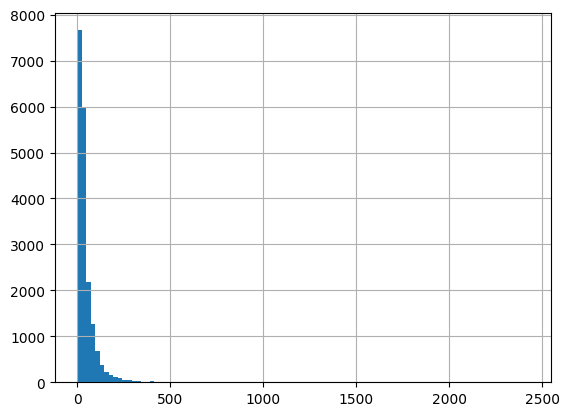

In [137]:
vacant_correct["vacant_flats_count"].hist(bins=100)

<AxesSubplot: >

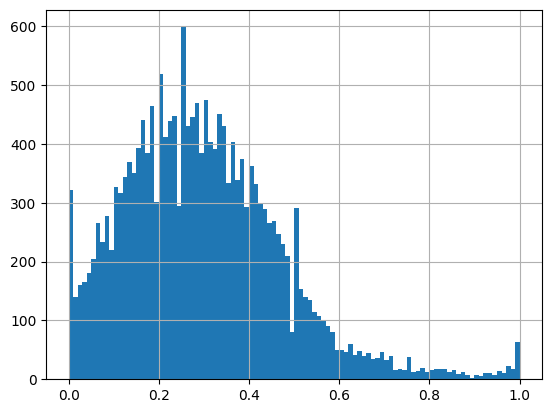

In [138]:
vacant_correct["vacant_flats_share"].hist(bins=100)

In [139]:
vacant_correct.to_csv("vacant_v2.csv", index=False)

In [140]:
vacant_by_mo.to_csv("vacant_by_mo.csv", index=False)